In [1]:
import os
import json as js
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load Kaggle credentials
with open('kaggle.json') as f:
    data = js.load(f)
    username = data['username']
    keys = data['key']

# Set Kaggle environment variables
os.environ['KAGGLE_USERNAME'] = username
os.environ['KAGGLE_KEY'] = keys

# Check for zip file existence
path_to_zip_file = 'telecom-churn.zip'
if not os.path.exists(path_to_zip_file):
    print('zip file does not exist, so the file will be downloaded')
    os.system('kaggle datasets download -d barun2104/telecom-churn')
else:
    print('zip file exists, so it will be used directly\n')

# Read the CSV file from the zip archive
df = pd.read_csv(path_to_zip_file)

# Print shape of the DataFrame
rows, columns = df.shape
print('Rows: ', rows, '\nColumns: ', columns)

df.head()


zip file exists, so it will be used directly

Rows:  3333 
Columns:  11


,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


               Total Customers  Churned Customers  Churn Rate
CustServCalls                                                
0                          697                 92    0.131994
1                         1181                122    0.103302
2                          759                 87    0.114625
3                          429                 44    0.102564
4                          166                 76    0.457831
5                           66                 40    0.606061
6                           22                 14    0.636364
7                            9                  5    0.555556
8                            2                  1    0.500000
9                            2                  2    1.000000


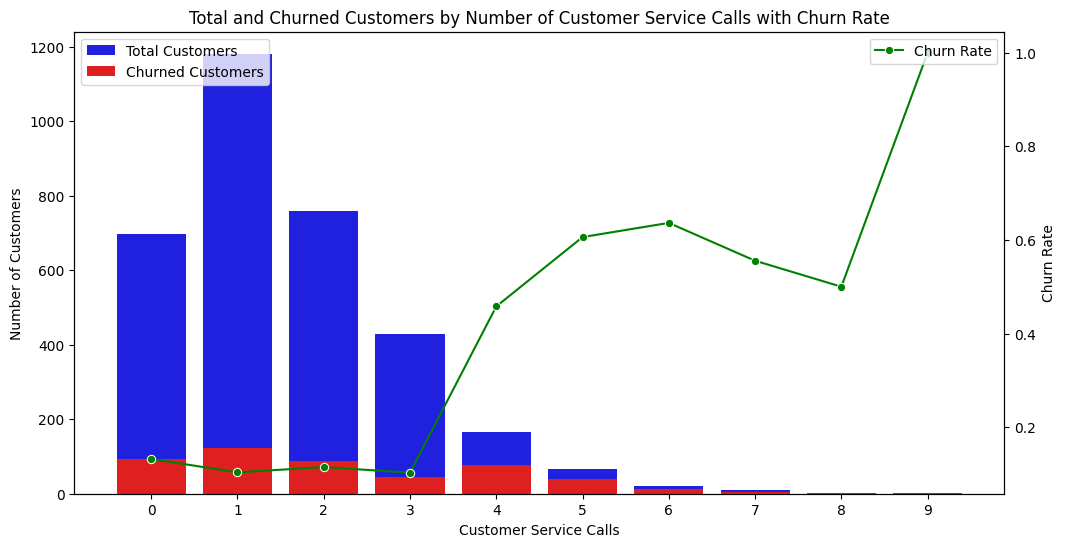

In [7]:
total_customers = df.groupby("CustServCalls")['Churn'].count()
churned_customers = df.groupby("CustServCalls")['Churn'].sum()
churn_rate = churned_customers / total_customers

result = pd.DataFrame({
    'Total Customers': total_customers,
    'Churned Customers': churned_customers,
    'Churn Rate': churn_rate
})

print(result)

plt.figure(figsize=(12, 6))
sns.barplot(x=result.index, y=result['Total Customers'], color='blue', label='Total Customers')
sns.barplot(x=result.index, y=result['Churned Customers'], color='red', label='Churned Customers')

# Adding labels and legend
plt.xlabel('Customer Service Calls')
plt.ylabel('Number of Customers')
plt.title('Total and Churned Customers by Number of Customer Service Calls')
plt.legend()
plt.show()

# Creating a line chart
plt.figure(figsize=(12, 6))
sns.lineplot(x=result.index, y=result['Churn Rate'], marker='o', color='green')

# Adding labels
plt.xlabel('Customer Service Calls')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Number of Customer Service Calls')
plt.show()
